<a href="https://colab.research.google.com/github/alifele/Bioinformatics-OpticalCNNwithFourierOptics/blob/master/Fourier_Sixth_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import load_sample_image
from scipy.special import jv
from scipy import signal
from scipy import misc

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [4]:
hW, hH = 600,300
hFreq = 10.5
x = np.linspace( 0, 1, 2*hW)     # columns (Width)
y = np.linspace( 0, 1, 2*hH)     # rows (Height)
[X,Y] = np.meshgrid(x,y)
Sin = np.sin(hFreq * np.pi * 2 * X)
W,H = np.shape(Sin)

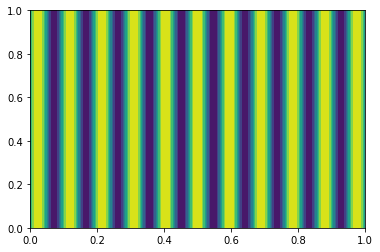

In [5]:
plt.contourf(X,Y,Sin)

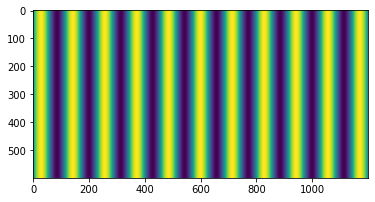

In [6]:
plt.imshow(Sin)

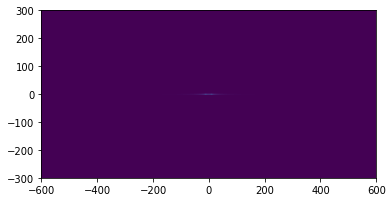

In [7]:
Fourier = np.fft.fft2(Sin)/(W*H)
Fourier = np.fft.fftshift(Fourier)
P = np.log(np.abs(Fourier)+0.001)
plt.imshow(P, extent=[-hW,hW,-hH,hH])

In [8]:
flower = load_sample_image("flower.jpg") / 255
flower = flower[:-1,:]
flower =  rgb2gray(flower)
H, W = flower.shape

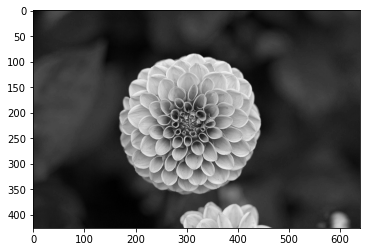

In [9]:
plt.imshow(flower, cmap='gray')
height, width = np.shape(flower)

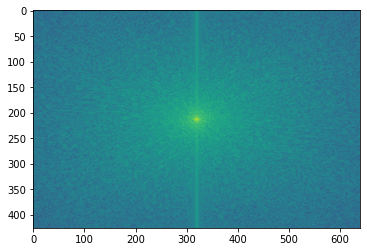

In [10]:
Fourier = np.fft.fft2(flower)
Fourier = np.fft.fftshift(Fourier)
P = np.log(np.abs(Fourier))
plt.imshow(P)


In [11]:
def mask_creator(height, width, r): #heigth, width
  mask = np.zeros((height, width))
  for i in range(height):
    for j in range(width):
      if (j-width/2)**2 + (i-height/2)**2 <r**2:
        mask[i,j] = 1

  return mask

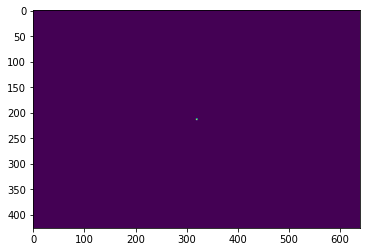

In [78]:
flower_mask = mask_creator(*flower.shape, 2)
plt.imshow(flower_mask)

In [79]:
masked_flower = Fourier * flower_mask

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


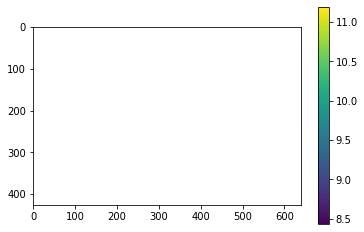

In [80]:
p = np.abs(masked_flower)
plt.imshow(np.log(p))
plt.colorbar()

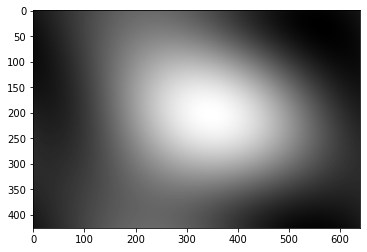

In [81]:
Flower = np.fft.fft2(masked_flower)
plt.imshow(np.abs(Flower), cmap='gray')

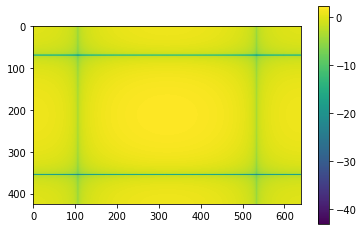

In [82]:
mask_Fourier = np.fft.fft2(flower_mask)
mask_Fourier = np.fft.fftshift(mask_Fourier)
P_mask_Fourier = np.abs(mask_Fourier)
plt.imshow(np.log(P_mask_Fourier))
plt.colorbar()

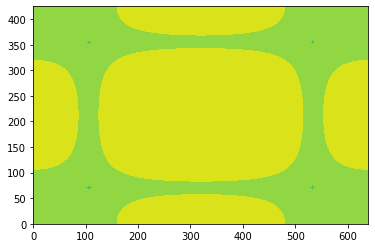

In [83]:
plt.contourf(np.log(P_mask_Fourier))

In [84]:
x = np.arange(-flower.shape[1]/2,-flower.shape[1]/2)
x.shape

(0,)

(0.0, 10.0)

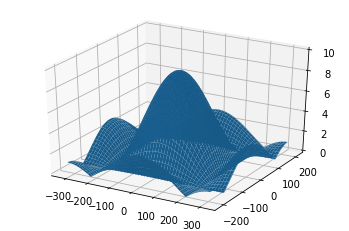

In [86]:
from mpl_toolkits.mplot3d import Axes3D
y = np.arange(-flower.shape[0]/2,flower.shape[0]/2)
x = np.arange(-flower.shape[1]/2,flower.shape[1]/2)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,P_mask_Fourier)
ax.set_zlim([0,10])

In [87]:
def mask_fourier_for_conv(a, window_size):
  x = np.linspace(-10,10,100*window_size)
  X,Y = np.meshgrid(x,x)
  J = 2 * np.pi * a**2 * jv(1,a*(np.sqrt(X**2+ Y**2)))/(a*(np.sqrt(X**2+ Y**2)) + 0.0001) 
  return J,X,Y

(-213.0, 213.0)

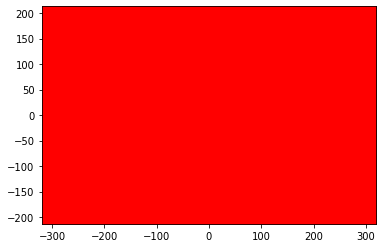

In [118]:
window_size = 150
a = 5
y = np.arange(-flower.shape[0]/2,flower.shape[0]/2)
x = np.arange(-flower.shape[1]/2,flower.shape[1]/2)
X,Y = np.meshgrid(x,y)
x_sample = np.linspace(-width/2,width/2,window_size)
y_sample = np.linspace(-height/2, height/2, window_size)
X_s, Y_s = np.meshgrid(x_sample,y_sample)
plt.contourf(X,Y,np.log(P_mask_Fourier))
plt.scatter(X_s, Y_s, marker='x', c='r')
plt.xlim(-width/2, width/2)
plt.ylim(-height/2, height/2)

In [119]:
x_sampling = x[::height//window_size]
y_sampling = y[::width//window_size]


In [120]:
sampling_indeces_x = (x[:, None] == x_sampling).argmax(axis=0)
sampling_indeces_y = (y[:, None] == y_sampling).argmax(axis=0)

In [121]:
sampling_indeces_x

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

In [122]:
weights = P_mask_Fourier[sampling_indeces_y][:,sampling_indeces_x]

In [123]:
X_sampling, Y_sampling = np.meshgrid(sampling_indeces_x, sampling_indeces_y)

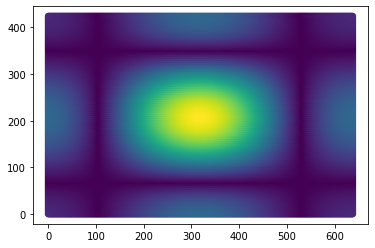

In [124]:
plt.scatter(X_sampling, Y_sampling, c = weights)

In [125]:
grad = signal.convolve2d(flower, weights, boundary='symm', mode='same')

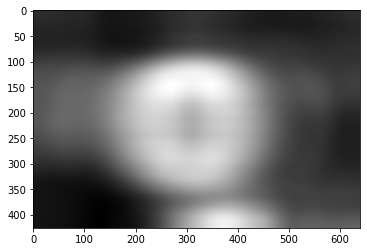

In [126]:
plt.imshow(grad, cmap="gray")


In [127]:
grad

array([[11748.57542269, 11748.33661429, 11748.76984657, ...,
        11883.831147  , 11887.09342073, 11889.18595346],
       [11746.80396681, 11746.5656193 , 11746.99773447, ...,
        11881.1027423 , 11884.35634822, 11886.43290338],
       [11742.53152749, 11742.31446959, 11742.76100743, ...,
        11875.08360904, 11878.34520721, 11880.4264782 ],
       ...,
       [ 8267.27901099,  8267.45845783,  8266.83215581, ...,
        19168.39968001, 19170.70113546, 19172.39799564],
       [ 8267.80137753,  8267.98979562,  8267.35653706, ...,
        19204.1670763 , 19206.49971258, 19208.21691358],
       [ 8268.31919793,  8268.50704952,  8267.864906  , ...,
        19224.69959727, 19227.04815652, 19228.78546389]])

NameError: ignored

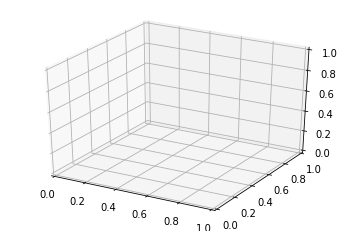

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, J)

In [ ]:
np.abs(Flower)